
🚀 Starting model training
✅ Model training complete!

📊 Model Performance on Test Set:
Root Mean Squared Error (RMSE): 36.78
This means the model's predictions are, on average, off by about $36.78.

🔍 Analyzing Feature Importance...


/tmp/ipython-input-1809446378.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importance, y=sorted_feature_importance.index, palette='viridis')


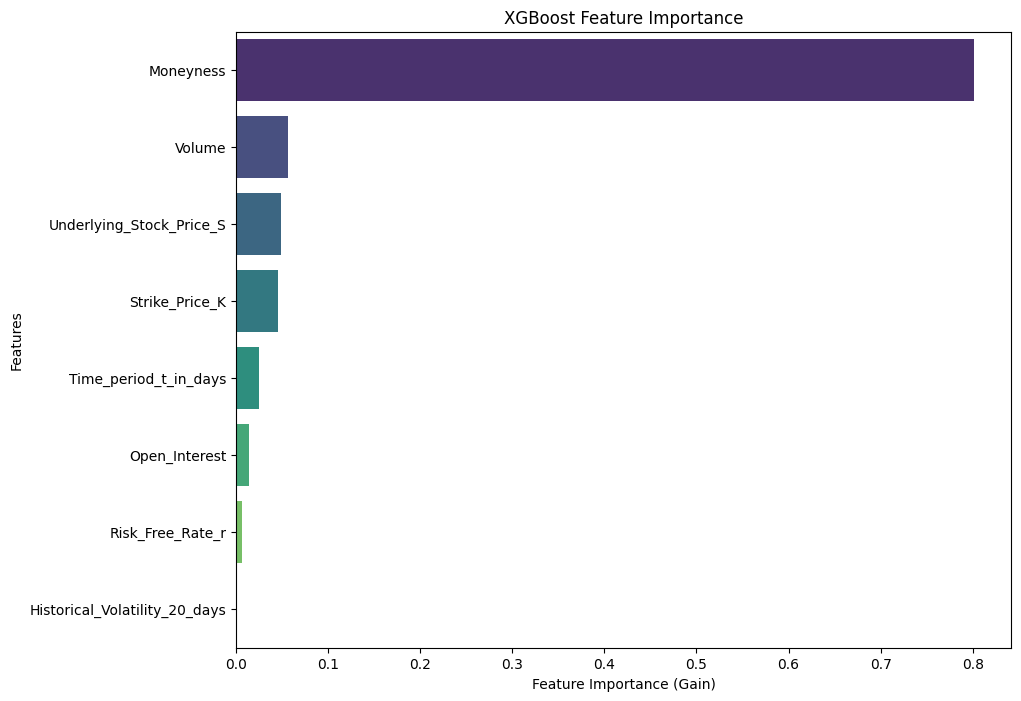


Top 10 Most Important Features:
Moneyness                        0.801561
Volume                           0.056432
Underlying_Stock_Price_S         0.048556
Strike_Price_K                   0.045850
Time_period_t_in_days            0.024834
Open_Interest                    0.014435
Risk_Free_Rate_r                 0.006973
Historical_Volatility_20_days    0.001359
dtype: float32


In [1]:
# --- 1. Import Necessary Libraries ---
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load the Data ---
df = pd.read_excel('Final_Without_IV.xlsx')

# --- 3. Define Features (X) and Target (y) ---
# Create the 'Moneyness' feature.
# We add a very small number (1e-6) to the denominator to prevent any potential division-by-zero errors.
df['Moneyness'] = df['Strike_Price_K'] / (df['Underlying_Stock_Price_S'] + 1e-6)
y = df['Option_Price_C']
X = df.drop('Option_Price_C', axis=1)

# --- 4. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Initialize and Train the XGBoost Model ---
# We initialize the XGBoost Regressor with some common parameters.
# n_estimators: The number of boosting rounds (trees) to build.
# learning_rate: A small number that scales the contribution of each tree. Prevents overfitting.
# n_jobs=-1: This tells XGBoost to use all available CPU cores to speed up training.
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=5,
    colsample_bytree=0.75,
    n_jobs=-1,
    random_state=42
)

print("\n🚀 Starting model training")

# Train the model on the training data.
xgboost_model.fit(X_train, y_train, verbose=True)

print("✅ Model training complete!")

# --- 6. Make Predictions and Evaluate the Model ---
# Use the trained model to make predictions on the unseen test data.
predictions = xgboost_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) to evaluate model performance.
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print the final performance metric.
print(f"\n📊 Model Performance on Test Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"This means the model's predictions are, on average, off by about ${rmse:.2f}.")

print("\n🔍 Analyzing Feature Importance...")

# Create a pandas Series for easy plotting
feature_importance = pd.Series(xgboost_model.feature_importances_, index=X.columns)

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importance, y=sorted_feature_importance.index, palette='viridis')

# Add labels and title
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

# You can also print the top 10 most important features
print("\nTop 10 Most Important Features:")
print(sorted_feature_importance.head(10))